<center><h1>Explore Vaccines Tweets</h1></center>

# Introduction


The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.

The following vaccines are included:  
* Pfizer/BioNTech;   
* Sinopharm;  
* Sinovac;  
* Moderna;  
* Oxford/AstraZeneca;   
* Covaxin;   
* Sputnik V.  



# Data preparation

## Load packages

In [1]:
! pip install spellchecker wordcloud  textblob nltk plotly pyspellchecker neattext missingno

In [2]:

import numpy as np 
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
##
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
##
import warnings
warnings.simplefilter("ignore")

## Load data

In [3]:
tweets_df = pd.read_csv("vaccination_all_tweets.csv" , nrows=100000)

# Data exploration


## Glimpse the data

In [4]:
print(f"data shape: {tweets_df.shape}")

data shape: (100000, 16)


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                100000 non-null  int64 
 1   user_name         100000 non-null  object
 2   user_location     76475 non-null   object
 3   user_description  92511 non-null   object
 4   user_created      100000 non-null  object
 5   user_followers    100000 non-null  int64 
 6   user_friends      100000 non-null  int64 
 7   user_favourites   100000 non-null  int64 
 8   user_verified     100000 non-null  bool  
 9   date              100000 non-null  object
 10  text              100000 non-null  object
 11  hashtags          79244 non-null   object
 12  source            99881 non-null   object
 13  retweets          100000 non-null  int64 
 14  favorites         100000 non-null  int64 
 15  is_retweet        100000 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory 

In [6]:
tweets_df.describe()

id  user_followers   user_friends  user_favourites  \
count  1.000000e+05    1.000000e+05  100000.000000     1.000000e+05   
mean   1.380110e+18    1.084861e+05    1193.335400     1.495101e+04   
std    1.493972e+16    8.675524e+05    5490.095553     4.380557e+04   
min    1.337728e+18    0.000000e+00       0.000000     0.000000e+00   
25%    1.369600e+18    9.900000e+01     125.000000     2.760000e+02   
50%    1.380094e+18    4.950000e+02     363.000000     2.039000e+03   
75%    1.394543e+18    2.397000e+03    1042.000000     1.056625e+04   
max    1.404324e+18    1.566557e+07  516578.000000     1.221784e+06   

            retweets      favorites  
count  100000.000000  100000.000000  
mean        3.242360      14.396720  
std        60.822593     213.467427  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       1.000000  
75%         1.000000       3.000000  
max     11288.000000   25724.000000

In [7]:
tweets_df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

### Missing data

In [8]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [9]:
missing_data(tweets_df)

id user_name user_location user_description user_created  \
Total        0         0         23525             7489            0   
Percent    0.0       0.0        23.525            7.489          0.0   
Types    int64    object        object           object       object   

        user_followers user_friends user_favourites user_verified    date  \
Total                0            0               0             0       0   
Percent            0.0          0.0             0.0           0.0     0.0   
Types            int64        int64           int64          bool  object   

           text hashtags  source retweets favorites is_retweet  
Total         0    20756     119        0         0          0  
Percent     0.0   20.756   0.119      0.0       0.0        0.0  
Types    object   object  object    int64     int64       bool

<AxesSubplot:>

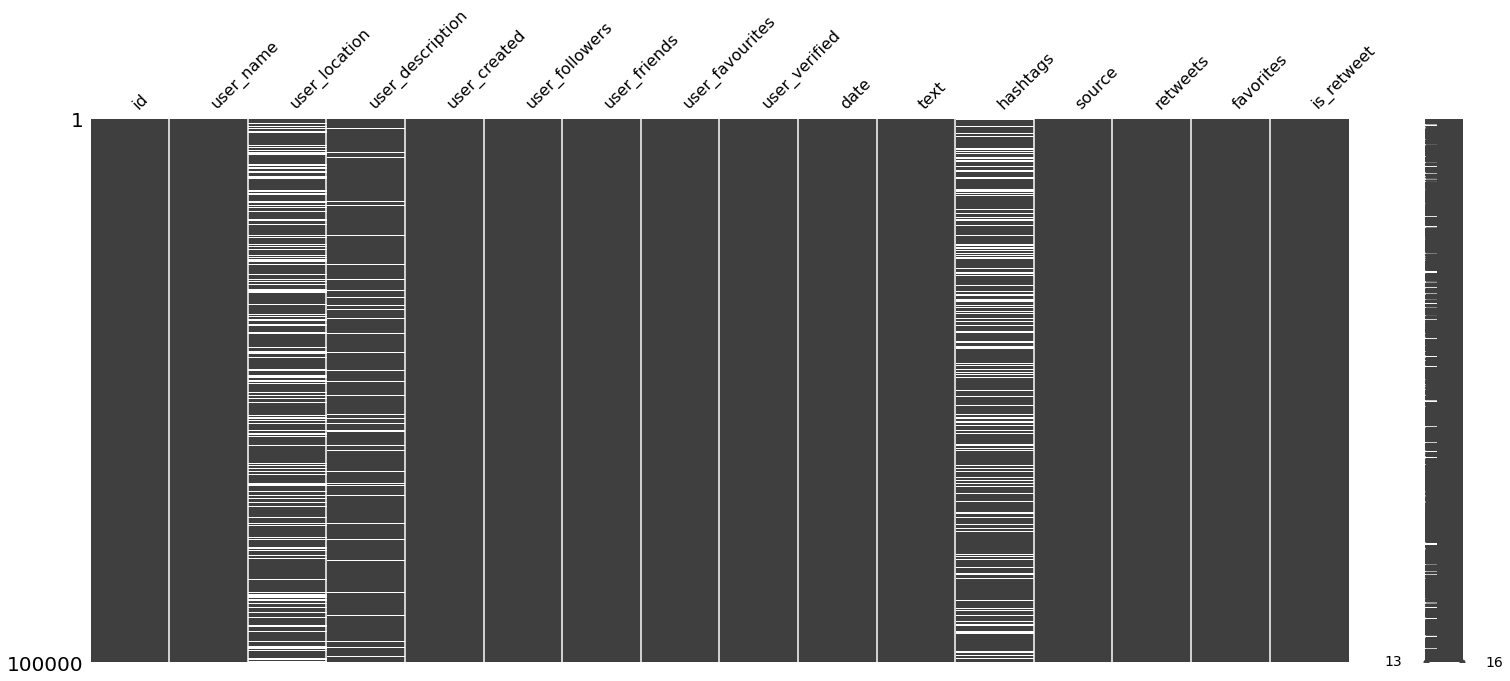

In [10]:
import missingno as mno
mno.matrix(tweets_df)

              column  percent
2      user_location    23.52
11          hashtags    20.76
3   user_description     7.49
12            source     0.12


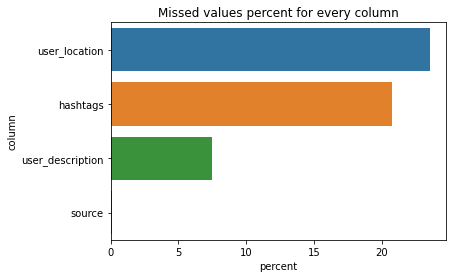

In [11]:
missed = pd.DataFrame()
missed['column'] = tweets_df.columns
missed['percent'] = [round(100* tweets_df[col].isnull().sum() / len(tweets_df), 2) for col in tweets_df.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]
print(missed)
fig = sns.barplot(
    x=missed['percent'], 
    y=missed["column"], 
    orientation='horizontal'
).set_title('Missed values percent for every column')

### Unique values

In [12]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [13]:
unique_values(tweets_df)

id  user_name  user_location  user_description  user_created  \
Total    100000     100000          76475             92511        100000   
Uniques  100000      50863          16370             49198         51841   

         user_followers  user_friends  user_favourites  user_verified    date  \
Total            100000        100000           100000         100000  100000   
Uniques           15000          6543            26868              2   98834   

           text  hashtags  source  retweets  favorites  is_retweet  
Total    100000     79244   99881    100000     100000      100000  
Uniques   99810     33003     263       346        770           1

### Most frequent values

In [14]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [15]:
most_frequent_values(tweets_df)

id          user_name user_location  \
Total                            100000             100000         76475   
Most frequent item  1377661711302467587  Workout Solutions         India   
Frequence                             1               2229          4307   
Percent from total                0.001              2.229         5.632   

                                                     user_description  \
Total                                                           92511   
Most frequent item  George Tsanis – Workout Solutions Health and F...   
Frequence                                                        2229   
Percent from total                                              2.409   

                           user_created user_followers user_friends  \
Total                            100000         100000       100000   
Most frequent item  2010-09-20 17:01:08              0            0   
Frequence                          2229            990         1460   
Percent from total                2.229           0.99         1.46   

                   user_favourites user_verified                 date  \
Total                       100000        100000               100000   
Most frequent item               0         False  2021-04-21 12:30:00   
Frequence                     1526         89433                    4   
Percent from total           1.526        89.433                0.004   

                                                                 text  \
Total                                                          100000   
Most frequent item  Got my second dose of the #Moderna #vaccine to...   
Frequence                                                          16   
Percent from total                                              0.016   

                       hashtags           source retweets favorites is_retweet  
Total                     79244            99881   100000    100000     100000  
Most frequent item  ['Moderna']  Twitter Web App        0         0      False  
Frequence                  5315            30181    69111     43881     100000  
Percent from total        6.707           30.217   69.111    43.881      100.0

## Visualize the data distribution

### Let's see top 25 most popular locations by the number of tweets.

In [16]:
ds = tweets_df['user_location'].value_counts().reset_index()
ds.columns = ['user_location', 'count']
ds = ds[ds['user_location']!='NA']
ds = ds.sort_values(['count'])

fig = px.bar(
    ds.tail(25), 
    x="count", 
    y="user_location", 
    orientation='h', title='Top 25 user locations by number of tweets', 
    width=800, 
    height=800
)

fig.show()

Now it's time to check last one categorical feature - `source`. Lets see top 40 sources by the number of tweets.

In [17]:
def pie_count(data, field, percent_limit, title):
    
    data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total    

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit] 
    others = otherdata['percentage'].sum()  
    maindata = data[data['percentage'] >= percent_limit]

    data = maindata
    other_label = "Others(<" + str(percent_limit) + "% each)"
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace=go.Pie(labels=labels,values=datavals)

    layout = go.Layout(
        title = title,
        height=600,
        width=600
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)
    
pie_count(tweets_df, 'user_location', 0.5, 'Number of tweets per location')

Now it's time to check last one categorical feature - `source`. Lets see top 40 sources by the number of tweets.

In [18]:
ds = tweets_df['source'].value_counts().reset_index()
ds.columns = ['source', 'count']
ds = ds.sort_values(['count'])

fig = px.bar(
    ds.tail(40), 
    x="count", 
    y="source", 
    color='count',
    orientation='h', 
    title='Top 40 user sources by number of tweets', 
    width=800, 
    height=800
)

fig.show()


In [19]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

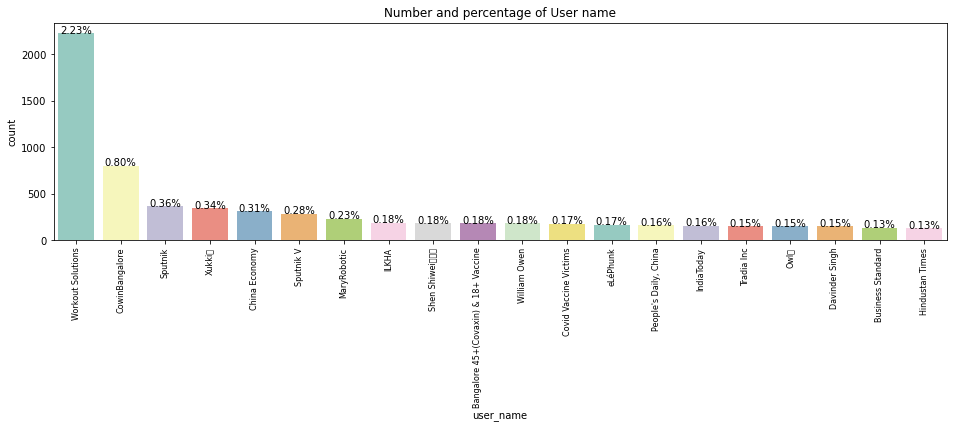

In [20]:
plot_count("user_name", "User name", tweets_df,4)

### User location

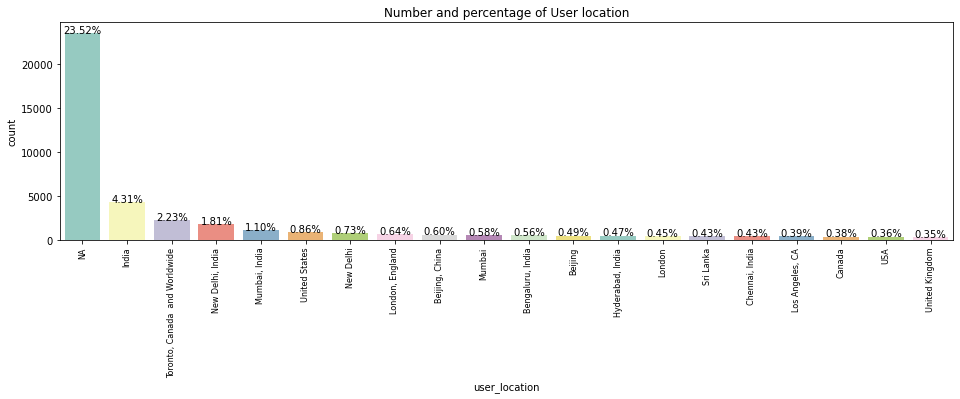

In [21]:
plot_count("user_location", "User location", tweets_df,4)

In [22]:
#plt.figure(figsize=(15,10))
#tweets_df['user_location'].value_counts().nlargest(20).plot(kind='barh')
#plt.xticks(rotation=60)


ds = tweets_df['user_location'].value_counts().reset_index()
ds.columns = ['user_location', 'count']
ds = ds.sort_values(['count'])
fig = px.bar(
    ds.tail(20), 
    x="user_location", 
    y='count',
    color ='count',
    orientation='v', 
    title='Top 20 locations', 
    width=800, 
    height=700
)
fig.show()

### Tweet source

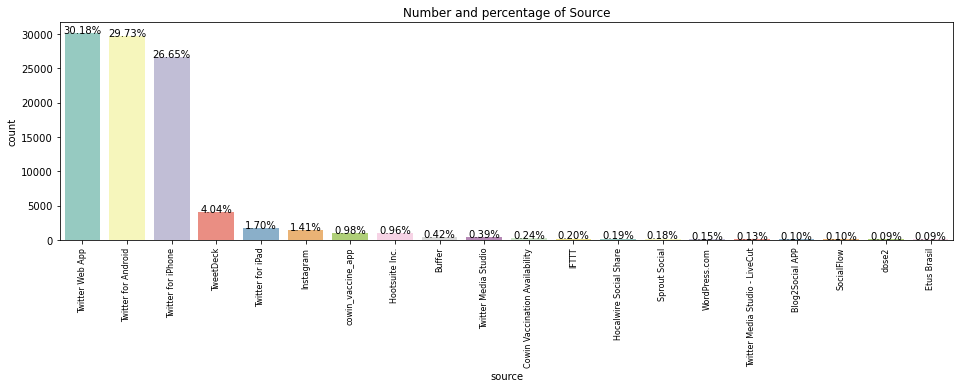

In [23]:
plot_count("source", "Source", tweets_df,4)

In [24]:
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')
tweets_df['hashtags'] = tweets_df['hashtags'].dropna()
ht_df = tweets_df.copy()
ht_df['hashtag'] = ht_df['hashtags'].apply(lambda row : split_hashtags(row))
ht_df = ht_df.explode('hashtag')
ht_df['hashtag'] = ht_df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
ht_df.loc[ht_df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'
#ht_df

Top 20 hashtags

In [25]:
ds = ht_df['hashtag'].value_counts().reset_index()
ds.columns = ['hashtag', 'count']
ds = ds.sort_values(['count'])
fig = px.bar(
    ds.tail(20), 
    x="count", 
    y='hashtag',
    color ='count',
    orientation='h', 
    title='Top 20 hashtags', 
    width=800, 
    height=700
)
fig.show()

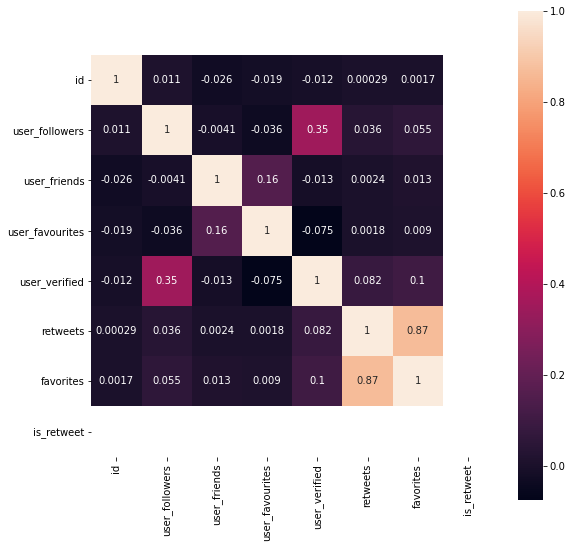

In [26]:
#plot heatmap to see the correlation between features
plt.subplots(figsize=(9, 9))
sns.heatmap(tweets_df.corr(), annot=True, square=True)
plt.show()

In [27]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [28]:

from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

### Text wordcloauds

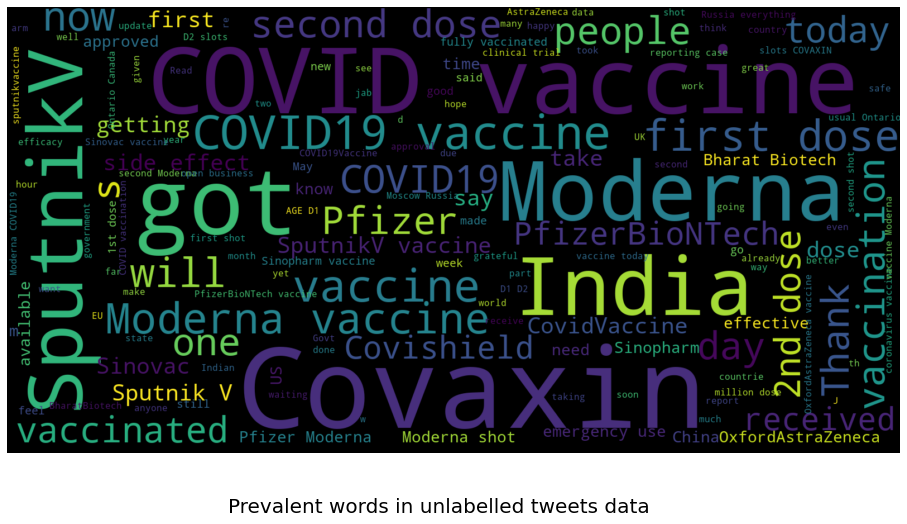

In [29]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in unlabelled tweets data')

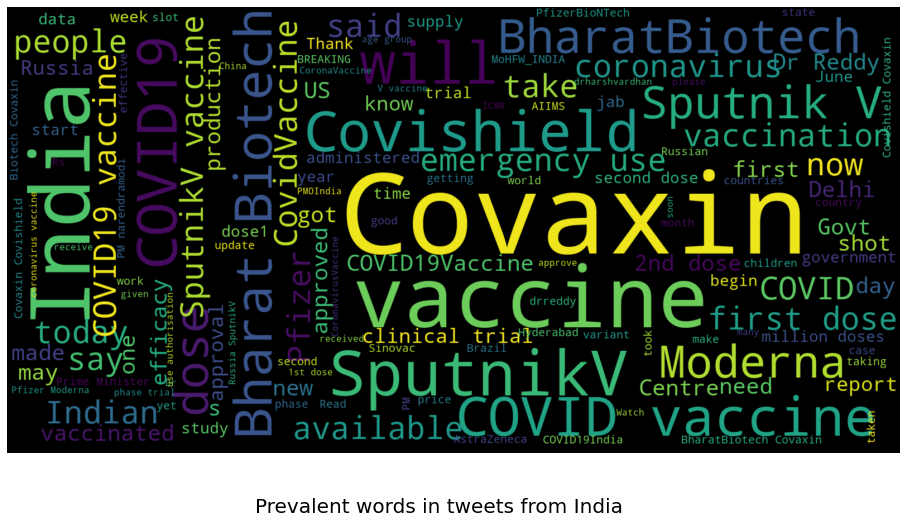

In [30]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

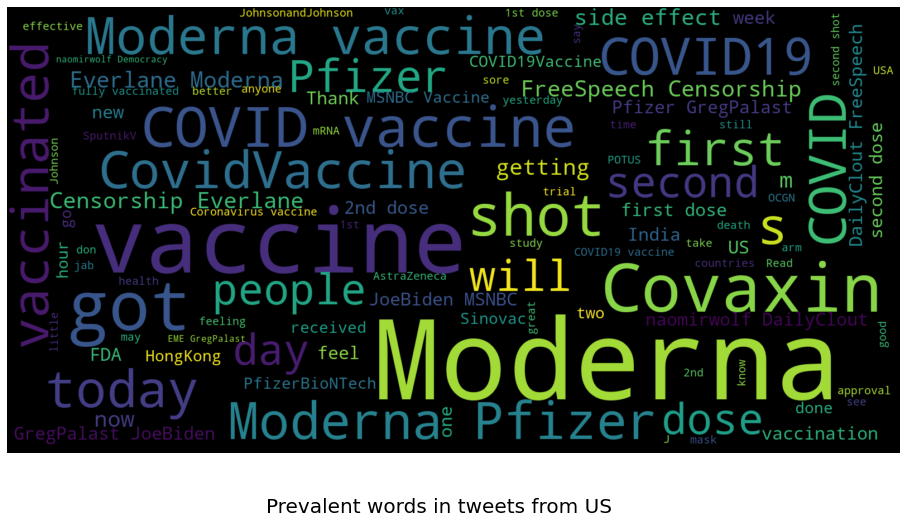

In [31]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

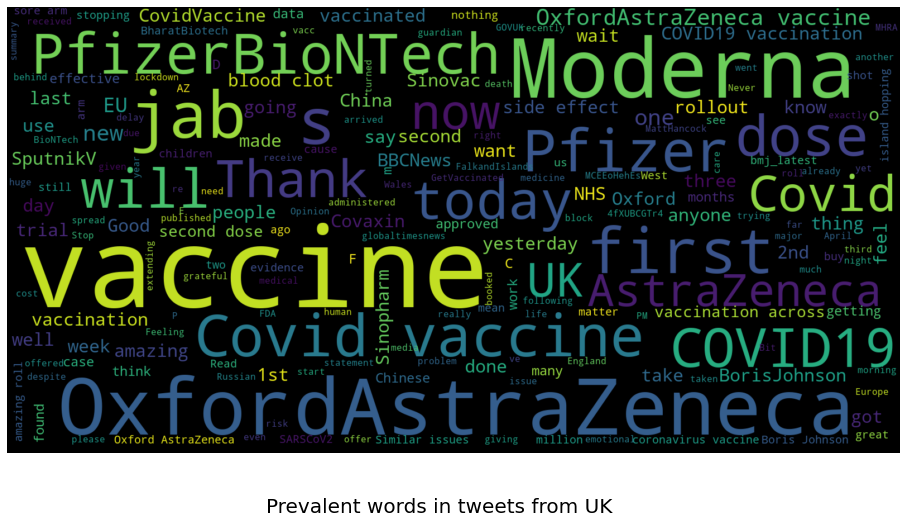

In [32]:
uk_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

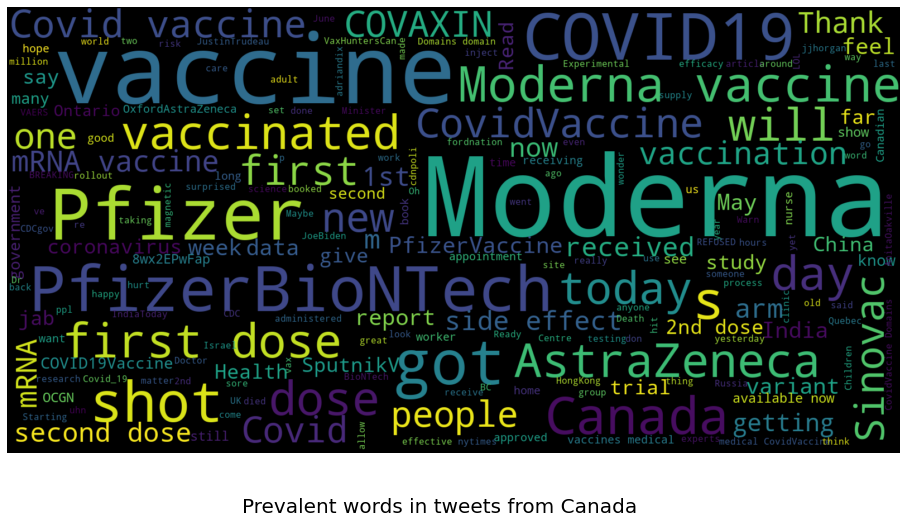

In [33]:
ca_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(ca_df['text'], title = 'Prevalent words in tweets from Canada')

### Hashtags analysis

In [34]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


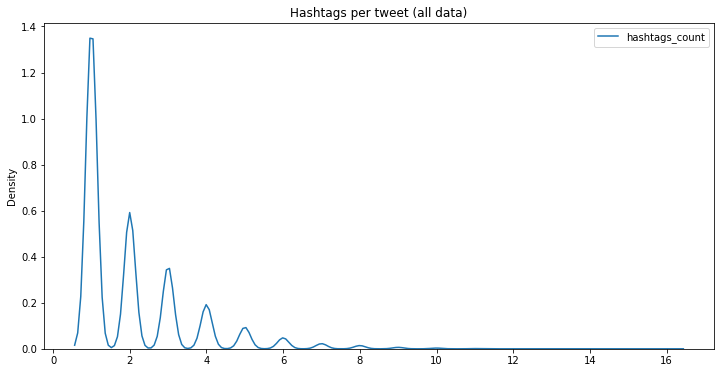

In [35]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [36]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 25178


In [37]:
tweets_df['hashtags_individual'].head()

0                                 [['PfizerBioNTech']]
1                                           [['None']]
2    [['coronavirus',  'SputnikV',  'AstraZeneca', ...
3                                           [['None']]
4    [['whereareallthesickpeople',  'PfizerBioNTech']]
Name: hashtags_individual, dtype: object

### Extract date and time features

In [38]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [39]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

### Time variation

In [40]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [41]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

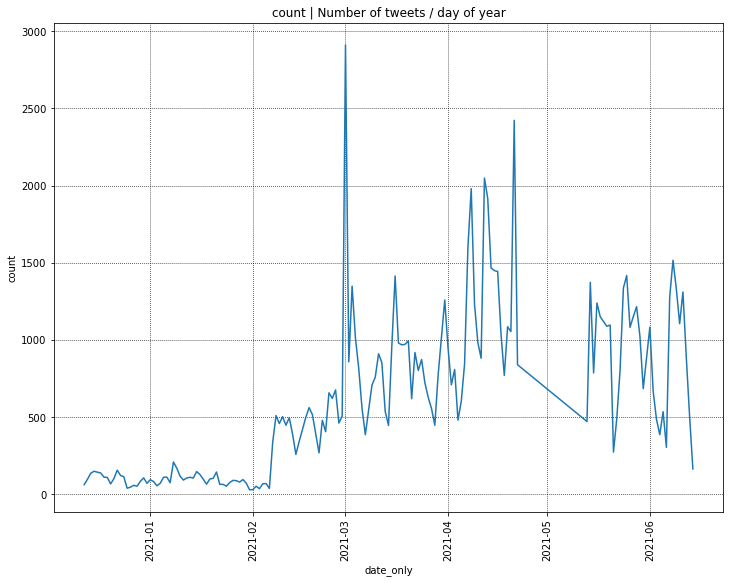

In [42]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

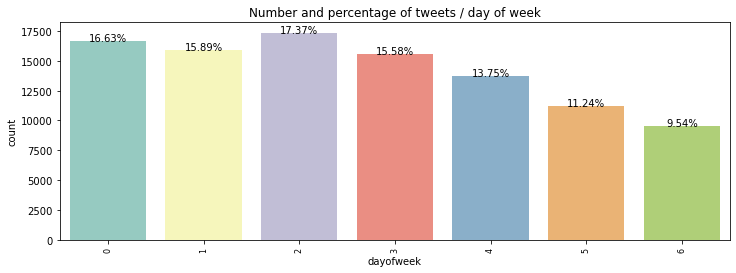

In [43]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

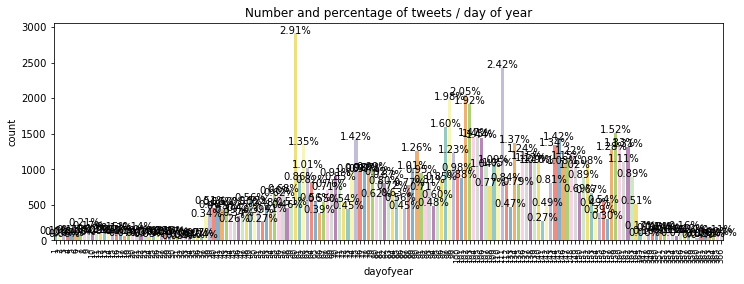

In [44]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

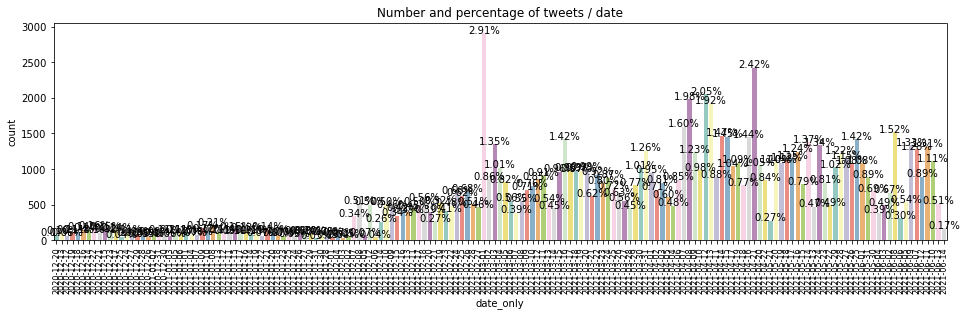

In [45]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

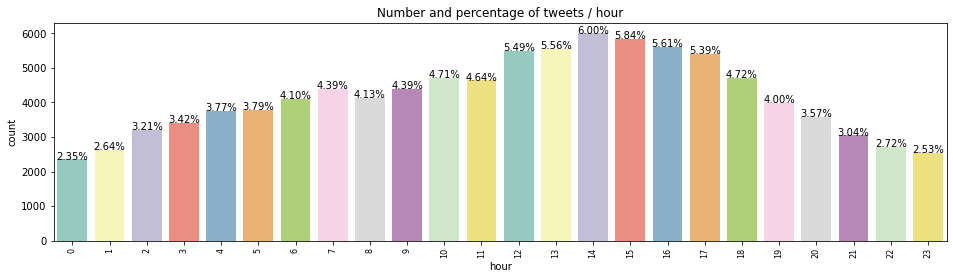

In [46]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

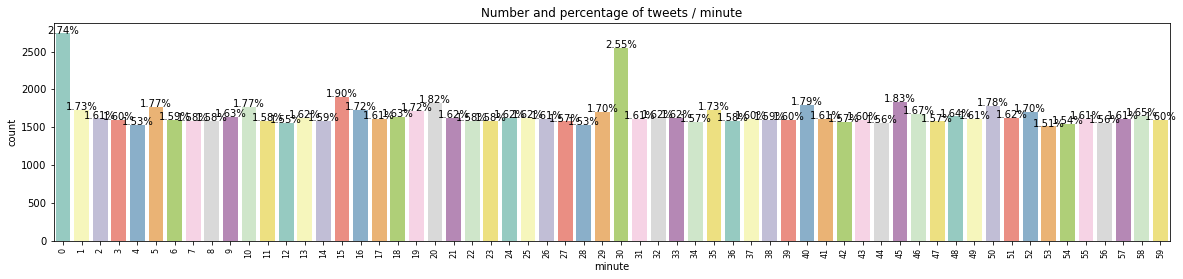

In [47]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)

## Preprocessing

In [48]:
#!pip install neattext

In [49]:
tweets_df['date'] = pd.to_datetime(tweets_df['date']).dt.date  #converting date column to date format
tweets_df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                         NA   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified        date  \
0             405          1692             3247          False  2020-12-20   
1             834           666              178          False  2020-12-13   
2              10            88              155          False  2020-12-12   
3           49165          3933            21853           True  2020-12-12   
4             152           580             1473          False  2020-12-12   

   ...                                hashtags_individual              datedt  \
0  ...                               [['PfizerBioNTech']] 2020-12-20 06:06:44   
1  ...                                         [['None']] 2020-12-13 16:27:13   
2  ...  [['coronavirus',  'SputnikV',  'AstraZeneca', ... 2020-12-12 20:33:45   
3  ...                                         [['None']] 2020-12-12 20:23:59   
4  ...  [['whereareallthesickpeople',  'PfizerBioNTech']] 2020-12-12 20:17:19   

   year  month  day  dayofweek  hour minute dayofyear   date_only  
0  2020     12   20          6     6      6       355  2020-12-20  
1  2020     12   13          6    16     27       348  2020-12-13  
2  2020     12   12          5    20     33       347  2020-12-12  
3  2020     12   12          5    20     23       347  2020-12-12  
4  2020     12   12          5    20     17       347  2020-12-12  

[5 rows x 27 columns]

In [50]:
len(tweets_df['date'].unique())  #Number of days considered

165

In [51]:
tweets_df.drop(columns={"user_name","user_description","user_created","user_followers",\
                   "user_friends","user_favourites","user_verified","hashtags","source","retweets","favorites","is_retweet"},inplace=True,axis=1)
# dropping unnecessary 
tweets_df.drop(columns={"user_location","hashtags_count","date","hashtags_individual","datedt",\
                   "year","month","day","dayofweek","hour","minute","dayofyear","date_only"},inplace=True,axis=1)


In [52]:

pd.set_option('display.max_colwidth', 700)
tweets_df.head()

id  \
0  1340539111971516416   
1  1338158543359250433   
2  1337858199140118533   
3  1337855739918835717   
4  1337854064604966912   

                                                                                                                                           text  
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF  
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm  
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P  
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4  
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq

In [53]:
import neattext as ntx
tweets_df['clean_data']=tweets_df['text']
# Cleaning the data using neattext library
tweets_df['clean_data']=tweets_df['text'].apply(ntx.remove_hashtags)

tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_urls)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_userhandles)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_multiple_spaces)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_special_characters)
tweets_df['clean_data']=tweets_df['clean_data'].str.lower()
#lower_text = data.str.lower()
tweets_df[['clean_data','text']].head()

clean_data  \
0                                                         same folks said daikon paste could treat a cytokine storm    
1  while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev    
2                                                                       russian vaccine is created to last 24 years    
3     facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 you were born i    
4                                                                         explain to me again why we need a vaccine    

                                                                                                                                           text  
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF  
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm  
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P  
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4  
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq

In [54]:
pd.set_option('display.max_colwidth', 1000)
tweets_df[['clean_data','text']]

clean_data  \
0                                                             same folks said daikon paste could treat a cytokine storm    
1      while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev    
2                                                                           russian vaccine is created to last 24 years    
3         facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 you were born i    
4                                                                             explain to me again why we need a vaccine    
...                                                                                                                  ...   
99995                                                                                       tema a batch of arrives in     
99996                                 is there any plans to allow vaccinated people to not wear maskfor how long we goi    
99997                                                                        get vaccinated protect yourself amp others    
99998                                                                                              get vaccinated today    
99999                       saudi gazette demonstrates 943 efficacy amp high safety profile in sputnik v continues to p    

                                                                                                                                                     text  
0                                                       Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF  
1            While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm  
2            #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P  
3            Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4  
4                 Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq  
...                                                                                                                                                   ...  
99995                                                                      Tema: A batch of #SputnikV arrives in #Albania 🇦🇱 \n👇\nhttps://t.co/648EUyncGz  
99996      @drharshvardhan @MoHFW_INDIA \nIs there any plans to allow vaccinated people to not wear mask???\nFor how long we goi… https://t.co/faxbhOPxov  
99997           Get Vaccinated \nProtect yourself &amp; other's\n#staysafe #covid_19 #covaxin #covisheild #sputnikv #vaccination… https://t.co/kGQxBMKAbx  
99998                  Get Vaccinated Today\n#staysafe #covid_19 #covaxin #covisheild #sputnikv #vaccination #vaccinated #vaccine https://t.co/UWBHaNHN0z  
99999  Saudi Gazette: #SputnikV demonstrates 94.3% efficacy &amp; high safety profile in #Bahrain  \n\n"Sputnik V continues to p… https://t.co/xbDXF8CdEn  

[100000 rows x 2 columns]

In [55]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')
remove_words=lambda x : ' '.join([word for word in x.split() if word not in stopwords.words('english')])
tweets_df['clean_data']=tweets_df['clean_data'].apply(remove_words)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

def tokenize(tweet_text):
    tokenizer = TweetTokenizer()
    tweet_tokens = tokenizer.tokenize(tweet_text)
    tweets_clean = []
    stemmer = PorterStemmer()
    for word in tweet_tokens:
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)
    return ' '.join(tweets_clean)

In [57]:
pd.set_option('display.max_colwidth', 1000)
tweets_df[['clean_data','text']]

clean_data  \
0                                         folks said daikon paste could treat cytokine storm   
1                 world wrong side history year hopefully biggest vaccination effort weve ev   
2                                                      russian vaccine created last 24 years   
3              facts immutable senator even youre ethically sturdy enough acknowledge 1 born   
4                                                                       explain need vaccine   
...                                                                                      ...   
99995                                                                     tema batch arrives   
99996                                    plans allow vaccinated people wear maskfor long goi   
99997                                                      get vaccinated protect amp others   
99998                                                                   get vaccinated today   
99999  saudi gazette demonstrates 943 efficacy amp high safety profile sputnik v continues p   

                                                                                                                                                     text  
0                                                       Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF  
1            While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm  
2            #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P  
3            Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4  
4                 Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq  
...                                                                                                                                                   ...  
99995                                                                      Tema: A batch of #SputnikV arrives in #Albania 🇦🇱 \n👇\nhttps://t.co/648EUyncGz  
99996      @drharshvardhan @MoHFW_INDIA \nIs there any plans to allow vaccinated people to not wear mask???\nFor how long we goi… https://t.co/faxbhOPxov  
99997           Get Vaccinated \nProtect yourself &amp; other's\n#staysafe #covid_19 #covaxin #covisheild #sputnikv #vaccination… https://t.co/kGQxBMKAbx  
99998                  Get Vaccinated Today\n#staysafe #covid_19 #covaxin #covisheild #sputnikv #vaccination #vaccinated #vaccine https://t.co/UWBHaNHN0z  
99999  Saudi Gazette: #SputnikV demonstrates 94.3% efficacy &amp; high safety profile in #Bahrain  \n\n"Sputnik V continues to p… https://t.co/xbDXF8CdEn  

[100000 rows x 2 columns]

In [58]:
tweets_df.drop('text',inplace=True,axis=1)

In [59]:
tweets_df

id  \
0      1340539111971516416   
1      1338158543359250433   
2      1337858199140118533   
3      1337855739918835717   
4      1337854064604966912   
...                    ...   
99995  1403333695365279746   
99996  1403330262172258307   
99997  1403328672405196814   
99998  1403323053904330758   
99999  1403318595728273408   

                                                                                  clean_data  
0                                         folks said daikon paste could treat cytokine storm  
1                 world wrong side history year hopefully biggest vaccination effort weve ev  
2                                                      russian vaccine created last 24 years  
3              facts immutable senator even youre ethically sturdy enough acknowledge 1 born  
4                                                                       explain need vaccine  
...                                                                                      ...  
99995                                                                     tema batch arrives  
99996                                    plans allow vaccinated people wear maskfor long goi  
99997                                                      get vaccinated protect amp others  
99998                                                                   get vaccinated today  
99999  saudi gazette demonstrates 943 efficacy amp high safety profile sputnik v continues p  

[100000 rows x 2 columns]

In [60]:
tweets_df.to_csv('tweets_unlabelled_cleaned_full.csv', encoding='utf-8', index=False)


In [61]:
tweets_df_labelled = pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv", encoding='latin1')

In [62]:
tweets_df_labelled

tweet_id  label  \
0     1.360342e+18      1   
1     1.382896e+18      2   
2     1.375673e+18      2   
3     1.381311e+18      1   
4     1.362166e+18      3   
...            ...    ...   
5995  1.370975e+18      2   
5996  1.379827e+18      3   
5997  1.384789e+18      2   
5998  1.382355e+18      1   
5999  1.380051e+18      2   

                                                                                                                                                                                                                                                                                                                       tweet_text  
0                                                                                                                                                                                       4,000 a day dying from the so called Covid-19 vaccine @DailyBeast reports. #vaccine #PfizerVaccine #Moderna \n\nhttps://t.co/p1nQWWZpk4  
1                      Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #consciousness #FridayThoughts #fridaymorning #CoronavirusIndia #COVID19India #?????_???????? #navratri #Thane #AmbedkarJayanti2021 #ModiJi #NarendraModi #SecondCOVIDWave #Covaxin https://t.co/bQNoMVowJg  
2                                                                    Hyderabad-based ?@BharatBiotech? has sought funds from the government to ramp up production of its indigenously developed Covid-19 vaccine, #Covaxin .\nThe company has written to the ??@DBTIndia? seeking Rs 100 crore to ramp up. https://t.co/wjWlVIGMC4  
3                                  Confirmation that Chinese #vaccines "dont have very high protection rates", according to the director of the China Centers for Disease Control, Gao Fu.\n\n#Sinovac effectiveness "found to be as low as 50.4% by researchers in Brazil"; &lt;50% is 'not useful'.\n\nhttps://t.co/S2OoHjd7Do  
4                                                                                                                                                                                                                 Lab studies suggest #Pfizer, #Moderna vaccines can protect against #coronavirusvariant\nhttps://t.co/NPaFA68m57  
...                                                                                                                                                                                                                                                                                                                           ...  
5995  @Swamy39 Dr. @Swamy39 jee :\n\nMany people like to get Covaxin vaccination done, but this is not available at most places and people are putting Covishield as the only vaccine available. If Rs. 250 is any issue, people are willing to pay more for #Covaxin - You may kindly help people on it. https://t.co/t5IOmwaxVy  
5996                                                                                                                    So happy to be fully vaccinated against COVID-19!! Im ready to serve more with all i can! ??????? #VaccinesWork #VaccinesSaveLives #Sinovac #GetVaccinated @ Manila, Philippines https://t.co/m6LYroEEg8  
5997                                                                             Serum Institute of India announces cost of Covishield vaccine. \nThe vaccine will cost Rs 400 in Govt hospitals &amp; Rs 600 in private hospitals.\n#Covaxin #India \n#Covishieldvaccine #COVID19 #SerumInstituteofIndia https://t.co/gik9zrR4JH  
5998                                                                                                                                                               @___batshitcrazy @BarrowfordHead @Bectully I had mine yesterday and havent been able to get out of bed today - I feel for you! #vaccinated #oxfordastrazeneca  
5999                                                                                             

In [63]:
tweets_df1=tweets_df

In [64]:
tweets_df1.rename(columns = {'id':'tweet_id'}, inplace = True)

In [65]:
tweets_df1

tweet_id  \
0      1340539111971516416   
1      1338158543359250433   
2      1337858199140118533   
3      1337855739918835717   
4      1337854064604966912   
...                    ...   
99995  1403333695365279746   
99996  1403330262172258307   
99997  1403328672405196814   
99998  1403323053904330758   
99999  1403318595728273408   

                                                                                  clean_data  
0                                         folks said daikon paste could treat cytokine storm  
1                 world wrong side history year hopefully biggest vaccination effort weve ev  
2                                                      russian vaccine created last 24 years  
3              facts immutable senator even youre ethically sturdy enough acknowledge 1 born  
4                                                                       explain need vaccine  
...                                                                                      ...  
99995                                                                     tema batch arrives  
99996                                    plans allow vaccinated people wear maskfor long goi  
99997                                                      get vaccinated protect amp others  
99998                                                                   get vaccinated today  
99999  saudi gazette demonstrates 943 efficacy amp high safety profile sputnik v continues p  

[100000 rows x 2 columns]

In [66]:
cond = tweets_df1['tweet_id'].isin(tweets_df_labelled['tweet_id'])
print(len(tweets_df1[cond].index))
tweets_df1.drop(tweets_df1[cond].index, inplace = True)



#ids2remove = pd.merge(tweets_df1, tweets_df_labelled, how='inner', on=['tweet_id'])['tweet_id']
#tweets_df1 = tweets_df1[ ~tweets_df1['tweet_id'].isin(ids2remove) ]

5053


In [67]:
len(tweets_df1)

94947

In [68]:
tweets_df1.drop('tweet_id',inplace=True,axis=1)
tweets_df1

clean_data
0                                         folks said daikon paste could treat cytokine storm
1                 world wrong side history year hopefully biggest vaccination effort weve ev
2                                                      russian vaccine created last 24 years
4                                                                       explain need vaccine
5               anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding
...                                                                                      ...
99995                                                                     tema batch arrives
99996                                    plans allow vaccinated people wear maskfor long goi
99997                                                      get vaccinated protect amp others
99998                                                                   get vaccinated today
99999  saudi gazette demonstrates 943 efficacy amp high safety profile sputnik v continues p

[94947 rows x 1 columns]

In [69]:
tweets_df1.to_csv('tweets_unlabelled_cleaned_1L.csv', encoding='utf-8', index=False)

In [11]:
! nvidia-smi

Failed to initialize NVML: Unknown Error
